In [8]:
import boto3
import csv
import json
import io
from PIL import Image, ImageDraw, ExifTags, ImageColor

In [2]:
def show_faces(photo):
    client = boto3.client('rekognition',
                      aws_access_key_id = access_key_id,
                      aws_secret_access_key = secret_access_key,
                      region_name='ap-south-1')
    
    with open(photo, 'rb') as source_image:
        source_bytes = source_image.read()
    stream = io.BytesIO(source_bytes)
    image = Image.open(photo,'r')      
#     image=Image.open(im)

    #Upload through imageBytes.

    #response is not limited.
    response = client.detect_faces(Image = {'Bytes': source_bytes,},Attributes=['ALL'])

    imgWidth, imgHeight = image.size  
    draw = ImageDraw.Draw(image)  
                    

    # calculate and display bounding boxes for each detected face       
    print('Detected faces for ' + photo)    
    for faceDetail in response['FaceDetails']:
        print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old')
        box = faceDetail['BoundingBox']
        left = imgWidth * box['Left']
        top = imgHeight * box['Top']
        width = imgWidth * box['Width']
        height = imgHeight * box['Height']
        print('Left: ' + '{0:.0f}'.format(left))
        print('Top: ' + '{0:.0f}'.format(top))
        print('Face Width: ' + "{0:.0f}".format(width))
        print('Face Height: ' + "{0:.0f}".format(height))

        points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)

        )
        draw.line(points, fill='#00d400', width=2)

        # Alternatively can draw rectangle. However you can't set line width.
        #draw.rectangle([left,top, left + width, top + height], outline='#00d400') 

    image.show()
    
    
    from IPython.display import display


#     path="/path/to/image.jpg"
    display(image)

    return len(response['FaceDetails'])

In [3]:
#Using Credentials
with open('credentials.csv','r') as input:
    next(input)
    reader = csv.reader(input)
    for line in reader:
        access_key_id = line[2]
        secret_access_key = line[3]

In [4]:
#initializing client
client = boto3.client('rekognition',
                      aws_access_key_id = access_key_id,
                      aws_secret_access_key = secret_access_key,
                      region_name='ap-south-1')

In [5]:
#Do this for each photo that is taken from the user's app that is updated to the server.
#images should be in jpg or png format
#attribute ALL provides all additional features of face
def celebrity_recognition(photo):
    with open(photo, 'rb') as source_image:
        source_bytes = source_image.read()

    #Upload through imageBytes.

    #response is not limited.
    response = client.recognize_celebrities(Image = {'Bytes': source_bytes,})
    print(json.dumps(response, indent=2))
    

In [6]:
# I am not a celebrity, and hence, The JSON respose categorizes me as unrecognized
celebrity_recognition('me_2.jpg')

{
  "CelebrityFaces": [],
  "UnrecognizedFaces": [
    {
      "BoundingBox": {
        "Width": 0.19453124701976776,
        "Height": 0.34583333134651184,
        "Left": 0.37031251192092896,
        "Top": 0.30694442987442017
      },
      "Confidence": 99.99893951416016,
      "Landmarks": [
        {
          "Type": "eyeLeft",
          "X": 0.43097323179244995,
          "Y": 0.440369188785553
        },
        {
          "Type": "eyeRight",
          "X": 0.5026018023490906,
          "Y": 0.4414612948894501
        },
        {
          "Type": "nose",
          "X": 0.46814852952957153,
          "Y": 0.48003286123275757
        },
        {
          "Type": "mouthLeft",
          "X": 0.4372618794441223,
          "Y": 0.5537943243980408
        },
        {
          "Type": "mouthRight",
          "X": 0.4934358596801758,
          "Y": 0.5536032915115356
        }
      ],
      "Pose": {
        "Roll": -0.2907973527908325,
        "Yaw": 4.0033111572265625,
      

Detected faces for me_2.jpg
The detected face is between 17 and 29 years old
Left: 501
Top: 216
Face Width: 197
Face Height: 247


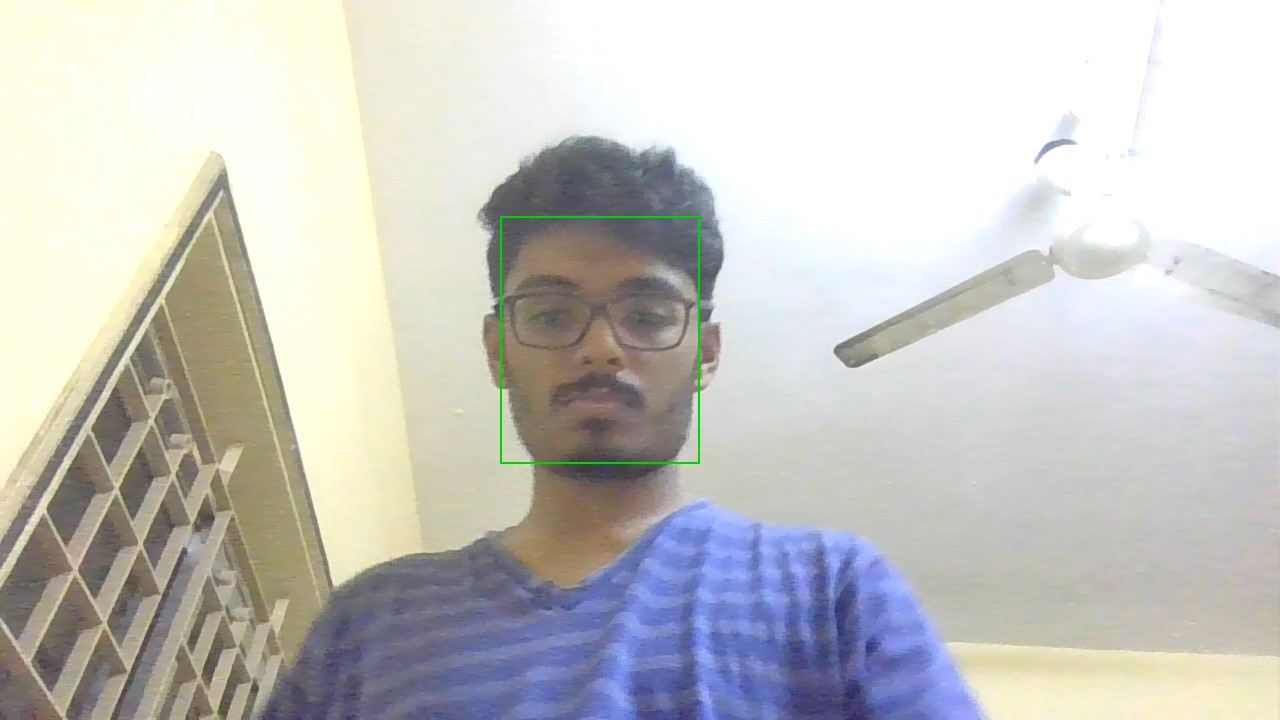

1

In [9]:
show_faces('me_2.jpg')

In [10]:
celebrity_recognition('oscar_selfie.jpg')

{
  "CelebrityFaces": [
    {
      "Urls": [
        "www.imdb.com/name/nm0177896"
      ],
      "Name": "Bradley Cooper",
      "Id": "1u73Lk",
      "Face": {
        "BoundingBox": {
          "Width": 0.26249998807907104,
          "Height": 0.46666666865348816,
          "Left": 0.4611110985279083,
          "Top": 0.404938280582428
        },
        "Confidence": 99.9999008178711,
        "Landmarks": [
          {
            "Type": "eyeLeft",
            "X": 0.5437871813774109,
            "Y": 0.5878213047981262
          },
          {
            "Type": "eyeRight",
            "X": 0.6289962530136108,
            "Y": 0.5813382267951965
          },
          {
            "Type": "nose",
            "X": 0.5770944356918335,
            "Y": 0.6494733095169067
          },
          {
            "Type": "mouthLeft",
            "X": 0.5522763729095459,
            "Y": 0.7363130450248718
          },
          {
            "Type": "mouthRight",
            "X": 0.640

Detected faces for oscar_selfie.jpg
The detected face is between 24 and 38 years old
Left: 375
Top: 176
Face Width: 131
Face Height: 185
The detected face is between 26 and 40 years old
Left: 241
Top: 165
Face Width: 93
Face Height: 140
The detected face is between 13 and 25 years old
Left: 71
Top: 58
Face Width: 106
Face Height: 120
The detected face is between 22 and 34 years old
Left: 539
Top: 115
Face Width: 95
Face Height: 124
The detected face is between 23 and 37 years old
Left: -34
Top: 45
Face Width: 83
Face Height: 135
The detected face is between 27 and 43 years old
Left: 171
Top: 140
Face Width: 72
Face Height: 119
The detected face is between 37 and 55 years old
Left: 423
Top: -1
Face Width: 71
Face Height: 93
The detected face is between 28 and 44 years old
Left: 252
Top: 30
Face Width: 64
Face Height: 98
The detected face is between 22 and 34 years old
Left: 170
Top: 29
Face Width: 60
Face Height: 89
The detected face is between 27 and 43 years old
Left: 564
Top: 29
Face

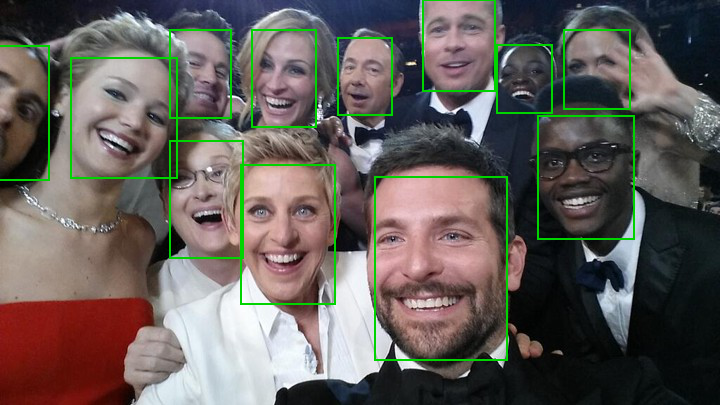

12

In [11]:
show_faces('oscar_selfie.jpg')